# **COMPUTER VISION**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**COMPUTER VISION - REGRESIÓN LINEAL**

Ingeniería en Telecomunicaciones.

# 1. Librerías

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# 2. Training data (Dataset)

Generar datos de forma similar a anterior ejemplo


In [16]:
# Generar datos de prueba (y = Xw + b + ruido)
def datos_prueba(w, b, num_ejemplos):
    X = tf.random.normal((num_ejemplos, w.shape[0]))
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.1)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [17]:
w_gen = tf.constant([0.1, 0.2, 0.4, 0.8])
b_gen = 1.0
features, labels = datos_prueba(w_gen, b_gen, 5000)
features.shape
labels.shape

TensorShape([5000, 1])

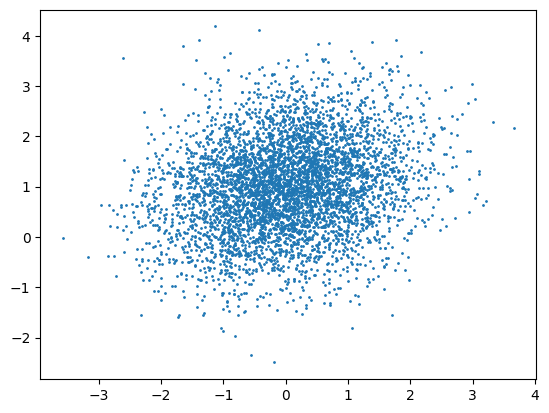

In [40]:
# Diagrama de dispersión de un feature vs el label
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

# 3. Lectura del dataset por lotes

Aleatorizar y leer por minilotes

In [18]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a TensorFlow data iterator."""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

In [19]:
batch_size = 10  # Tamaño del lote
data_iter = load_array((features, labels), batch_size)

In [20]:
# Leer un lote del dataset
next_batch = next(iter(data_iter))
print(next_batch)

(<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[ 1.9898031 , -0.62586945, -0.31758204,  0.5785844 ],
       [ 0.12157769, -1.0501808 , -1.4587528 ,  0.8562285 ],
       [-1.7622232 ,  0.20580769, -0.23863181, -1.4241084 ],
       [ 0.9619184 , -0.42414963,  1.1402926 , -1.8417016 ],
       [-1.3521919 , -0.52454394,  0.4562436 ,  0.19048503],
       [-0.16158584, -1.0199616 , -0.40374482, -1.1433234 ],
       [-0.64882666,  0.63305247,  2.6758387 , -0.15834713],
       [-0.5873777 ,  1.8757186 , -0.59593445, -0.5392186 ],
       [-0.07514568, -1.7272679 ,  1.8309296 , -0.7089267 ],
       [ 0.8172424 , -1.3065131 , -0.03168097,  0.6948696 ]],
      dtype=float32)>, <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 1.3870041e+00],
       [ 9.1927320e-01],
       [-3.1239626e-01],
       [-8.2032476e-04],
       [ 1.1740175e+00],
       [-2.6382720e-01],
       [ 1.8377316e+00],
       [ 7.2664952e-01],
       [ 8.1258053e-01],
       [ 1.2518235e+00]], dtype=float32)>)

# 4. Algoritmo de inicialización de parámetros

https://www.tensorflow.org/api_docs/python/tf/keras/initializers


Clase: RandonNormal (especificar argumento desviación estándar)

In [23]:
n_inputs = features.shape[1]
n_outputs = labels.shape[1]

# Inicializar pesos con RandomNormal
initializer_weights = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)

# Inicializar sesgo en 0 con Zeros
initializer_bias = tf.keras.initializers.Zeros()

# Inicializar los pesos (W) y sesgo (b)
W = tf.Variable(initializer_weights(shape=(n_inputs, n_outputs)), name='weights')
b = tf.Variable(initializer_bias(shape=(n_outputs,)), name='bias')

print("Pesos inicializados (W):\n", W.numpy())
print("Sesgo inicializado (b):\n", b.numpy())

Pesos inicializados (W):
 [[ 0.00298531]
 [-0.02043729]
 [ 0.00697256]
 [ 0.01046358]]
Sesgo inicializado (b):
 [0.]


# 5. Modelo

*   `tensorflow`: https://www.tensorflow.org/
*   `keras`: https://keras.io/
*   `Sequential` (clase): https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
*   `Dense`: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [24]:
# Modelo de regresión lineal mediante un modelo secuencial de keras y una capa
# FC de una neurona


# Definir el modelo secuencial
model = tf.keras.Sequential()

# Añadir una capa densa con una sola neurona
model.add(tf.keras.layers.Dense(
    units=1,
    input_shape=(n_inputs,),
    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer=tf.keras.initializers.Zeros()
))

# Elegir el optimizador
# Usar Adam
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Usar Minibatch SGD
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.03)

# Compilar el modelo con el optimizador deseado
#model.compile(optimizer=optimizer_adam, loss='mean_squared_error')
# Alternativamente, para SGD:
model.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Resumen del modelo para ver la estructura
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

# 6. Función de pérdida

https://www.tensorflow.org/api_docs/python/tf/keras/losses

Clase: MeanSquaredError (Error cuadrático medio o norma $L_2$). Utilizar sin argumentos

In [26]:
# Pérdida por error cuadrático medio
loss = tf.keras.losses.MeanSquaredError()

# 7. Algoritmo de optimización

Minibatch stochastic gradient descent (SGD)

Argumento: tasa de aprendizaje (learning rate: 0.03)

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [27]:
trainer = tf.keras.optimizers.SGD(learning_rate=0.03)

# 8. Entrenamiento

En cada época, se realiza una una pasada completa por el conjunto de datos, tomando iterativamente minilotes (entradas y etiquetas).

In [28]:
num_epochs = 10
for epoch in range(num_epochs):
    for X_batch, y_batch in data_iter:
        with tf.GradientTape() as tape:
            # Forward pass: obtener las predicciones
            y_pred = model(X_batch, training=True)
            # Calcular la pérdida
            l = loss(y_batch, y_pred)

        # Calcular los gradientes
        grads = tape.gradient(l, model.trainable_variables)
        # Aplicar los gradientes al optimizador
        trainer.apply_gradients(zip(grads, model.trainable_variables))

    # Evaluar la pérdida en el conjunto completo de datos (opcional)
    y_pred_full = model(features, training=False)
    l_full = loss(labels, y_pred_full)

    print(f'Época {epoch + 1}, pérdida {l_full.numpy():.6f}')

Época 1, pérdida 0.009838
Época 2, pérdida 0.009884
Época 3, pérdida 0.010124
Época 4, pérdida 0.009884
Época 5, pérdida 0.010000
Época 6, pérdida 0.009936
Época 7, pérdida 0.009821
Época 8, pérdida 0.009812
Época 9, pérdida 0.009968
Época 10, pérdida 0.009913


In [35]:
w


array([[0.09657983],
       [0.2021149 ],
       [0.39134648],
       [0.79800576]], dtype=float32)

Comparación con los parámetros originales

In [34]:
w = model.get_weights()[0]
print('error al estimar w', w_gen - tf.reshape(w, w_gen.shape))
b = model.get_weights()[1]
print('error al estimar b', b_gen - b)

error al estimar w tf.Tensor([ 0.00342017 -0.00211489  0.00865352  0.00199425], shape=(4,), dtype=float32)
error al estimar b [0.00652754]


# 9. Referencias

Dive into Deep Learning